In [186]:
a,b = zip([1,2],[3,4])
print(a,b)

(1, 3) (2, 4)


978


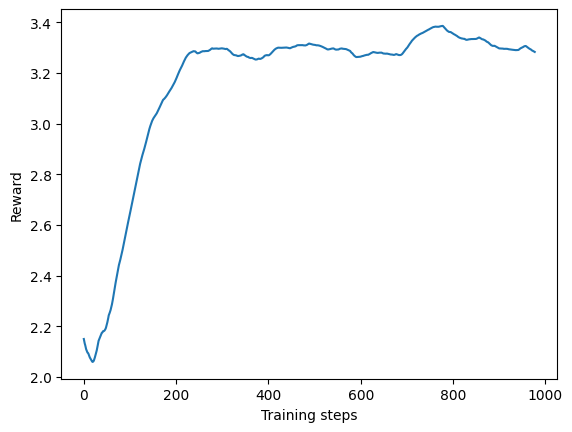

In [397]:


import torch
from time import time
from DocBuilder.utils import split_list_to_batch, restore_batched_list, unbind_sparse, top_k_sparse, tensor_retuen_type
from DocBuilder.Retriever_k_means import cluster_builder
import matplotlib.pyplot as plt
with open("reward_number.txt", "r") as f:
    r = f.readlines()
r = [float(i) for i in r][0:]
print(len(r))
moving_avg = []
ma = sum(r[:50])/50
ratio=1-20/len(r)
for x in r:
    ma = ratio * ma + (1-ratio) * x
    moving_avg.append(ma)

plt.ylabel("Reward")
plt.xlabel("Training steps")
plt.plot(moving_avg)
plt.show()